In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp


## Punto 4

In [2]:
df = pd.read_csv('Parabolico.csv', sep=',', encoding='utf-8')
x = df['X'].values
y = df['Y'].values


In [3]:
def Newton_Gregory_Generator(X, Y):
    Diff = np.zeros((len(X), len(Y)))
    Diff[:, 0] = Y
    n = len(X)
    for i in range(1, n):
        for j in range(i, len(Y)):
            Diff[j, i] = (Diff[j, i-1] - Diff[j-1, i-1]) / (X[j] - X[j-i])
    return Diff


In [4]:
def Newton_gregory(X, Y, x):
    n = len(X)
    Diff = Newton_Gregory_Generator(X, Y)
    y = Y[0]
    h = X[1] - X[0]

    poly = 1.0

    for i in range(1, n):
        poly *= (x - X[i-1])
        for j in range(i, len(Y)):
            h = X[j] - X[j-i]
            Diff[j, i] = (Diff[j, i-1] - Diff[j-1, i-1])/h
        y += (poly * Diff[i, i])
    return y, np.round(Diff, 2)


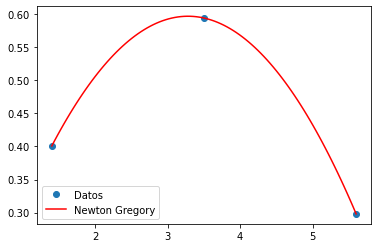

In [5]:
x_c = np.linspace(np.min(x), np.max(x), 100)
y_c, _ = Newton_gregory(x, y, x_c)

plt.plot(x, y, "o", label="Datos")
plt.plot(x_c, y_c, color="red", label="Newton Gregory")
plt.legend()
plt.show()


In [6]:
x_s = sp.Symbol('x', Real='True')
y_s, _ = Newton_gregory(x, y, x_s)
y_s = y_s.simplify()
y_s


-0.0554912422401579*x**2 + 0.363970234266202*x + 5.55111512312578e-17

In [7]:
def initial_theta(x_s, y_s):
    return sp.atan(y_s.diff(x_s).subs(x_s, x[0]))


def initial_v(x_s, y_s, theta):
    return sp.sqrt((y_s.diff(x_s).subs(x_s, x[0]))**2 + 1)


theta = initial_theta(x_s, y_s)
theta_deg = theta.evalf(subs={x_s: x[0]}) * 180 / np.pi
v = initial_v(x_s, y_s, theta)

print("Theta: ", theta_deg)
print("V: ", v)


Theta:  11.7826435353643
V:  1.02152423966742


## Punto 5

In [8]:
df = pd.read_csv('InterpolacionNewtonNoequi.csv', sep=',', encoding='utf-8')
x = df['X'].values
y = df['Y'].values


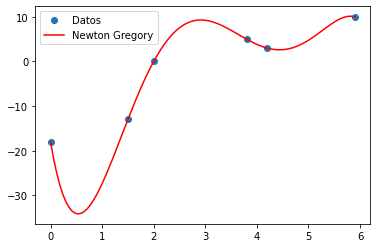

In [9]:
x_c = np.linspace(np.min(x), np.max(x), 100)
y_c, _ = Newton_gregory(x, y, x_c)

plt.plot(x, y, "o", label="Datos")
plt.plot(x_c, y_c, color="red", label="Newton Gregory")
plt.legend()
plt.show()


In [10]:
x_s = sp.Symbol('x', Real='True')
y_s, _ = Newton_gregory(x, y, x_s)
y_s = y_s.simplify()
y_s


-0.34145435774264*x**5 + 5.84804869821673*x**4 - 35.6998197753506*x**3 + 89.657566164176*x**2 - 68.8369730888011*x - 18.0